# Tugas Data Visualization 1

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Dalam tugas ini, kita akan menggunakan dataset publik: Housing Price. Dataset ini berisi berbagai informasi mengenai properti-properti yang dijual. Namun, kita hanya akan menggunakan kolom:

* MSZoning: Klasifikasi zona lokasi properti
  * RH: Zona perumahan padat
  * RM: Zona perumahan sedang
  * RL: Zona perumahan lengang

* SalePrice: Harga jual properti dalam USD

# Import Data

In [2]:
# Prepare dataset

df = pd.read_csv('Data Tugas 1/train_house.csv') ### tulis kode Anda di sini
df.index = df['Id']

house = df[['MSZoning', 'SalePrice']]
house

,MSZoning,SalePrice
Id,,
1,RL,208500
2,RL,181500
3,RL,223500
4,RL,140000
5,RL,250000
...,...,...
1456,RL,175000
1457,RL,210000
1458,RL,266500


# Check Missing Data

In [3]:
# Cek apakah ada data yang kosong -- jangan diganti

total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
SalePrice,0,0.0
MSZoning,0,0.0


# Visualization

### Soal:

1. Buat histogram data SalePrice untuk kategori MSZoning RH, RM, dan RL
2. Tentukan central tendency tiap-tiap histogram!
3. Tentukan bentuk tiap-tiap histogram!
4. Buat analisis mengenai distribusi SalePrice dihubungkan dengan informasi mengenai MSZoning!

### Jawaban:

1 & 2

In [4]:
# Mencari tahu kategori dalam MSZoning

kategori = house['MSZoning'].unique() ### tulis kode Anda di sini
print('Kategori MSZoning = ', kategori)

Kategori MSZoning =  ['RL' 'RM' 'C (all)' 'FV' 'RH']


<function matplotlib.pyplot.show(*args, **kw)>

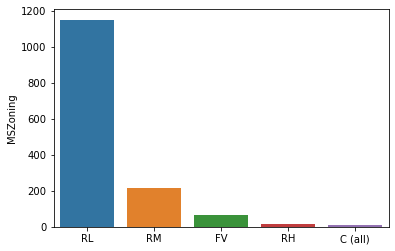

In [11]:
# Membuat bar plot MSZoning

plt.figure(figsize=(6,4))
sns.barplot(x=house.MSZoning.value_counts().index,
            y=house.MSZoning.value_counts())
plt.show

In [19]:
RH = house['SalePrice'].loc[house['MSZoning']=='RH']

# Print nilai central tendency RH
print('Mean RH = ',RH.mean()) ### tulis kode Anda di sini)
print('Median RH = ', np.median(RH)) ### tulis kode Anda di sini)
print('Mode RH = ', stats.mode(RH))### tulis kode Anda di sini)

Mean RH =  131558.375
Median RH =  136500.0
Mode RH =  145000


In [7]:
RM = house['SalePrice'].loc[house['MSZoning']=='RM']

# Print nilai central tendency RH
print('Mean RM = ',RM.mean()) ### tulis kode Anda di sini)
print('Median RM = ', np.median(RM)) ### tulis kode Anda di sini)
print('Mode RM = ', RM.mode())### tulis kode Anda di sini)

Mean RM =  126316.83027522935
Median RM =  120500.0
Mode RM =  0    115000
1    140000
dtype: int64


In [8]:
RL = house['SalePrice'].loc[house['MSZoning']=='RL']

# Print nilai central tendency RH
print('Mean RL = ',RL.mean()) ### tulis kode Anda di sini)
print('Median RL = ', np.median(RL)) ### tulis kode Anda di sini)
print('Mode RL = ', stats.mode(RL))### tulis kode Anda di sini)

Mean RL =  191004.99478714162
Median RL =  174000.0
Mode RL =  135000


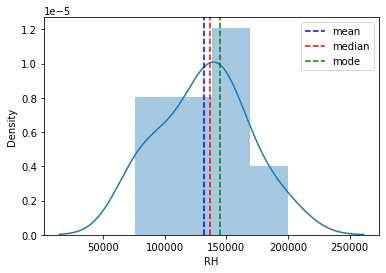

In [9]:
# Plot RH
p = sns.distplot(RH, axlabel='RH')

# Central Tendency
line1 = plt.axvline(RH.mean(), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.median(RH), color='r', linestyle='--', label='median')
line3 = plt.axvline(stats.mode(RH), color='g', linestyle='--', label='mode')

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
plt.show()

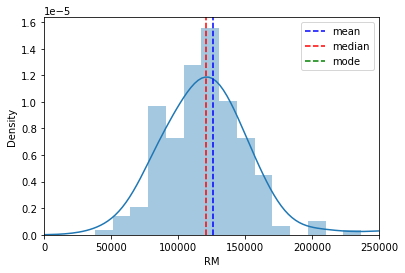

In [10]:
# Plot RM
p = sns.distplot(RM, axlabel='RM')

# Central Tendency
line1 = plt.axvline(RM.mean(), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.median(RM), color='r', linestyle='--', label='median')
# line3 = plt.axvline(stats.mode(RM), color='g', linestyle='--', label='mode')

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
plt.xlim([0, 250000])
plt.show()

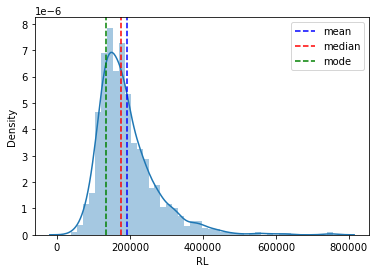

In [11]:
# Plot RL
p = sns.distplot(RL, axlabel='RL')

# Central Tendency
line1 = plt.axvline(RL.mean(), color='b', linestyle='--', label='mean')
line2 = plt.axvline(np.median(RL), color='r', linestyle='--', label='median')
line3 = plt.axvline(stats.mode(RL), color='g', linestyle='--', label='mode')

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
plt.show()

3. Bentuk histogram 


* RH = Distribusi Normal
* RM = Distribusi dengan Outlier
* RL = Distribusi Right Skewed 

4. Analisis:

Dari dataset house price terdapat 1460 data baris. Klasifikasi zona lokasi properti (MSZoning) terdiri dari RL, RM, RH, FV, dan C (all). Jumlah properti terbanyak berupa RL, RM, FV, RH, dan C (all). Berdasarkan plot distribusi dan central tendency pada zona RH, RM, dan RL. Pada zona RH memiliki central tendency 145000 dan berbentuk distribusi normal. Pada zona RM memiliki central tendecy 120500.0 dan berbentuk distribusi normal dengan kehadiran outliers. Pada zona RL memiliki central tendecy 174000.0 dan berbentuk distribusi right skewed. Dari penjelasan diatas dapat ditafsirkan bahwa harga dari sebuah properti pada suatu zona akan berbeda satu sama yang lain. Dimana pada zona RH memiliki variasi harga yang cukup sempit, pada zona RM memiliki variasi yang mulai bervariasi, dan pada zona RL memiliki harga yang sangat bervariasi dengan didominasi harga yang lebih rendah dari central tendency.
